# Relationship of US and Taiwan Stock Indices &
# Potential Systematic Strtegies

```
TW stock trading hours: 9:00 AM to 1:30 PM Taiwan time
US stock trading hours: 9:30 AM to 4:00 PM EDT/EST
                        9:30 PM to 4:00 AM (+1 day) Taiwan time (EDT)
                        8:30 PM to 3:00 AM (+1 day) Taiwan time  (EST)
                        
TWII = TSEC weighted index
GSPC = S&P 500
SOX = PHLX Semiconductor
EWT = iShares MSCI Taiwan Capped ETF
                        
```

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Data Processing

In [73]:
TWII = pd.read_csv('^TWII.csv')
GSPC = pd.read_csv('^GSPC.csv')
SOX = pd.read_csv('^SOX.csv')
EWT = pd.read_csv('EWT.csv')

In [74]:
TWII['TWII Return'] = TWII['Adj Close'].diff()
GSPC['GSPC Return'] = GSPC['Adj Close'].diff()
SOX['SOX Return'] = SOX['Adj Close'].diff()
EWT['EWT Return'] = EWT['Adj Close'].diff()

In [75]:
data = pd.merge(TWII[['Date','TWII Return']],GSPC[['Date','GSPC Return']],on='Date')
data = pd.merge(data,SOX[['Date','SOX Return']],on='Date')
data = pd.merge(data,EWT[['Date','EWT Return']],on='Date')

In [76]:
data['TWII Return prev'] = [None] + list(data['TWII Return'])[:-1]
data['GSPC Return prev'] = [None] + list(data['GSPC Return'])[:-1]
data['SOX Return prev'] = [None] + list(data['SOX Return'])[:-1]
data['EWT Return prev'] = [None] + list(data['EWT Return'])[:-1]

In [77]:
data['TWII Return day'] = TWII['Adj Close'] - TWII['Open']

In [78]:
data = data.dropna()
data.head()

,Date,TWII Return,GSPC Return,SOX Return,EWT Return,TWII Return prev,GSPC Return prev,SOX Return prev,EWT Return prev,TWII Return day
2,2010-05-19,-26.139648,-5.750000,1.989014,-0.216211,-13.420410,-16.139892,-10.534912,-0.355206,31.511231
3,2010-05-20,-134.729004,-43.460083,-10.235047,-0.679530,-26.139648,-5.750000,1.989014,-0.216211,-132.767578
4,2010-05-21,-186.719727,16.099975,8.505860,0.216214,-134.729004,-43.460083,-10.235047,-0.679530,8.512695
5,2010-05-24,85.019531,-14.039917,-6.566773,-0.030884,-186.719727,16.099975,8.505860,0.216214,26.552246
6,2010-05-25,-236.358398,0.380005,1.969025,-0.293432,85.019531,-14.039917,-6.566773,-0.030884,-151.816406


In [79]:
data.shape

(2341, 10)

## Historical Trend

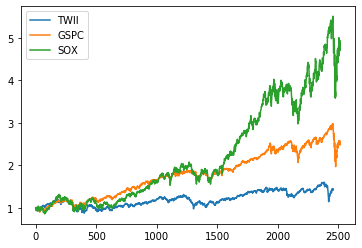

In [71]:
plt.plot(TWII['Adj Close']/TWII['Adj Close'][0], label='TWII')
plt.plot(GSPC['Adj Close']/GSPC['Adj Close'][0], label='GSPC')
plt.plot(SOX['Adj Close']/SOX['Adj Close'][0], label='SOX')
plt.legend()

## Relationship of US stock indices & TWII daily return

In [65]:
model = sm.OLS(data['TWII Return'],data[['SOX Return prev','GSPC Return prev']],missing='drop').fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            TWII Return   R-squared (uncentered):                   0.139
Model:                            OLS   Adj. R-squared (uncentered):              0.139
Method:                 Least Squares   F-statistic:                              190.1
Date:                Fri, 15 May 2020   Prob (F-statistic):                    3.01e-77
Time:                        16:22:28   Log-Likelihood:                         -13614.
No. Observations:                2349   AIC:                                  2.723e+04
Df Residuals:                    2347   BIC:                                  2.724e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SOX Return prev      0.8756      0.168      5.205      0.000       0.546       1.205
GSPC Return prev     0.7271      0.126      5.762      0.000       0.480       0.975
==============================================================================
Omnibus:                      702.430   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9816.249
Skew:                          -1.016   Prob(JB):                         0.00
Kurtosis:                      12.807   Cond. No.                         3.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

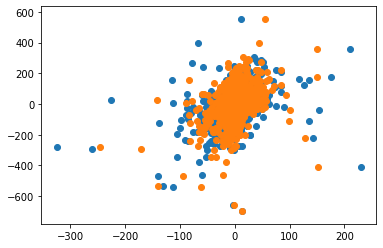

In [67]:
plt.scatter(data['GSPC Return prev'], data['TWII Return'])
plt.scatter(data['SOX Return prev'], data['TWII Return'])

In [96]:
np.corrcoef(data['GSPC Return prev'], data['TWII Return'])

array([[1.        , 0.35876463],
       [0.35876463, 1.        ]])

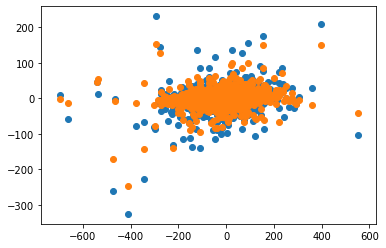

In [94]:
plt.scatter(data['TWII Return'], data['GSPC Return'])
plt.scatter(data['TWII Return'], data['SOX Return'])

In [97]:
np.corrcoef(data['GSPC Return'], data['TWII Return'])

array([[1.       , 0.2215863],
       [0.2215863, 1.       ]])

```
TWII daily return and GSPC/SOX daily return are well correlated
```

## Using US stock indices to predict TWII intraday return

In [53]:
model = sm.OLS(data['TWII Return day'],data[['SOX Return prev','GSPC Return prev']],missing='drop').fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        TWII Return day   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.6163
Date:                Fri, 15 May 2020   Prob (F-statistic):                       0.540
Time:                        16:09:13   Log-Likelihood:                         -13032.
No. Observations:                2362   AIC:                                  2.607e+04
Df Residuals:                    2360   BIC:                                  2.608e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SOX Return prev      0.1409      0.127      1.108      0.268      -0.109       0.390
GSPC Return prev    -0.0850      0.095     -0.891      0.373      -0.272       0.102
==============================================================================
Omnibus:                      290.448   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1193.448
Skew:                          -0.542   Prob(JB):                    7.02e-260
Kurtosis:                       6.310   Cond. No.                         3.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

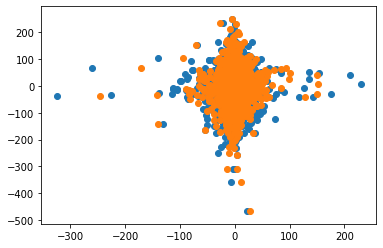

In [55]:
plt.scatter(data['GSPC Return prev'], data['TWII Return day'])
plt.scatter(data['SOX Return prev'], data['TWII Return day'])

In [99]:
np.corrcoef(data['GSPC Return prev'], data['TWII Return day'])

array([[1.        , 0.00431108],
       [0.00431108, 1.        ]])

```
Intraday trading (buy at open & sell at close) of TWII in proportion to GSPC daily return from the previous day is not profitable
```

## Using EWT to predict TWII intraday return

In [103]:
model = sm.OLS(data['TWII Return day'],data['EWT Return prev'],missing='drop').fit()

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        TWII Return day   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.529
Date:                Fri, 15 May 2020   Prob (F-statistic):                       0.216
Time:                        16:53:09   Log-Likelihood:                         -12920.
No. Observations:                2341   AIC:                                  2.584e+04
Df Residuals:                    2340   BIC:                                  2.585e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
EWT Return prev    -4.3793      3.542     -1.236      0.216     -11.325       2.567
==============================================================================
Omnibus:                      285.222   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.862
Skew:                          -0.543   Prob(JB):                    2.49e-249
Kurtosis:                       6.249   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

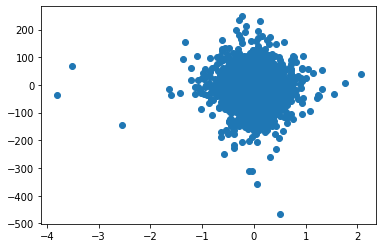

In [101]:
plt.scatter(data['EWT Return prev'],data['TWII Return day'])

In [102]:
np.corrcoef(data['EWT Return prev'],data['TWII Return day'])

array([[ 1.        , -0.02380843],
       [-0.02380843,  1.        ]])

```
Intraday trading (buy at open & sell at close) of TWII in proportion to EWT daily return from the previous day is not profitable
```